In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
df.columns = [x.strip().replace(' ', '_') for x in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Accuracy is not a good indicator of performance when classification distributions in the data are highly skewed. In the `wine` data, we have that there are a lot of data-points for mediocre wines, but far fewer for very good or very bad wines. Lets plot the count of observations for each quality category:

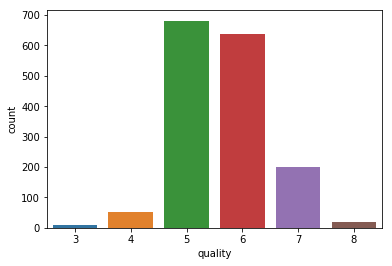

In [7]:
sns.countplot(x='quality', data=df)
plt.show()

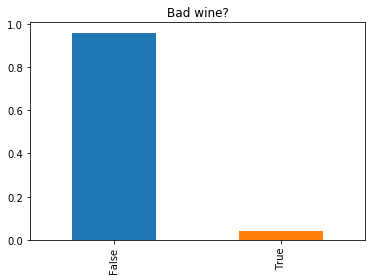

In [33]:
df['badwine'] = (df.quality.isin([3, 4]))
weights = np.ones_like(df.badwine)/float(len(df.badwine))
df.badwine.value_counts(normalize=True).plot(kind='bar', title='Bad wine?')
plt.show()

In [35]:
df.badwine.value_counts(normalize=True)

False    0.9606
True     0.0394
Name: badwine, dtype: float64

We see that the data is unevenly distributed amongst the two classes: less than 4% of wines are classified as bad, while 96% are classified otherwise.
How is this related to accuracy?
Say you train a classifier using this data to predict whether a wine will be bad or not.
You evaluate its performance and it turns out to be 96%. Pretty good, right?

![](https://memegenerator.net/img/instances/65941506/whoa-whoa-whoa-not-so-fast.jpg)

Thing is, we could have an overly-optimistic classifier that classifies _every_ wine as not bad.

![](http://29.media.tumblr.com/tumblr_lltzgnHi5F1qzib3wo1_400.jpg)

In [43]:
df['badwine_optimistic'] = False
df.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,badwine,badwine_optimistic
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,False
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False,False
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False,False
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False,False
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,False
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,False,False
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,False,False
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,False,False
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,False,False
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,False,False


So it turn out accuracy is not always a reliable metric of performance.
With this in mind, we can think of other metrics that can help us evaluate our models better under certain circumstances.

## Precision

Precision is the proportion of true positives: the ratio of wines classified as bad that were actually bad.
It is computed as number of true positives (count of wines classified as bad which were actually bad) over the count of _all_ positives (count of all wines classified as bad, irrespective of their classification).
In other words,

$$ \text{Precision} = \frac{\text{True positives}}{(\text{True positives} + \text{False negatives})} $$

As our optimistic algorithm classified every wine as not bad, the numerator   it gets a 0 precision value. Pretty shitty.

In [45]:
0/0

ZeroDivisionError: division by zero